In [1]:
#! jupyter nbconvert --to html dataset-preprocess.ipynb

In [2]:
import os
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# import random
# random.seed(42)
# np.random.seed(42)
# np.random.RandomState(42)
# os.environ['TF_DETERMINISTIC_OPS'] = '1' 

In [3]:
finish_sound = "afplay /Users/mehmet/Documents/vs-code/winsquare.mp3"
# play sound when finished
os.system(finish_sound)

0

In [4]:
classes = ['Non_Demented','Very_Mild_Demented','Mild_Demented','Moderate_Demented']
folder_path = '/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
datafile = ['','','','']
dataframe = pd.DataFrame()
for i in range(len(classes)):
    datafile[i] = sorted(os.listdir(folder_path + classes[i]))
    filenames = pd.DataFrame(datafile[i], columns=['filename'])
    class_labels = pd.DataFrame(np.full((len(datafile[i]),1), classes[i]), columns=['class_label'])
    dataframe = pd.concat([dataframe, pd.concat([filenames, class_labels], axis=1)], axis=0)
# delete index
dataframe = dataframe.reset_index(drop=True)
# change all class labels, drop last 9 characters and make them lowercase
dataframe['class_label'] = dataframe['class_label'].str[:-9]
dataframe.head()

,filename,class_label
0,non.jpg,Non
1,non_10.jpg,Non
2,non_100.jpg,Non
3,non_1000.jpg,Non
4,non_1001.jpg,Non


In [5]:
class_counts = []
for i in datafile:
    class_counts.append(len(i)) 
    print('There are',len(i),'images belonging to',classes[datafile.index(i)], 'class')
print('Total number of images:', sum(class_counts))

There are 3200 images belonging to Non_Demented class
There are 2240 images belonging to Very_Mild_Demented class
There are 896 images belonging to Mild_Demented class
There are 64 images belonging to Moderate_Demented class
Total number of images: 6400


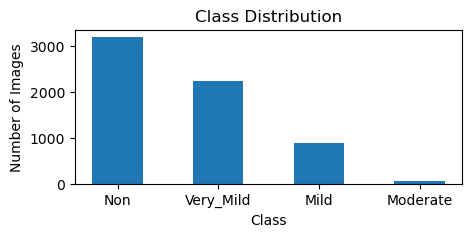

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2)
bins = np.linspace(0 - .25, 3 + .25, 8)
ax.hist(dataframe['class_label'].values,bins=bins)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
plt.show()

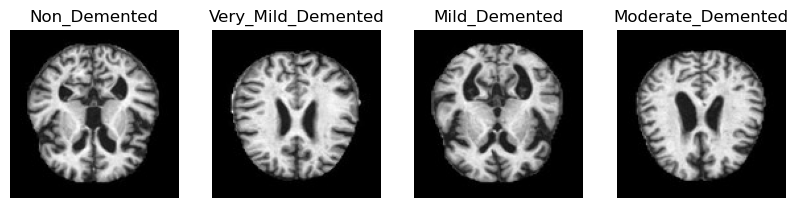

In [7]:
# Display 1 random images from each class

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(10, 5)
for i in range(len(classes)):
    for j in range(1):
        # get random image dataframe
        start = dataframe[dataframe['class_label']==classes[i][:-9]].first_valid_index()
        end = dataframe[dataframe['class_label']==classes[i][:-9]].last_valid_index() 
        sample = np.random.randint(start, end)-start
        dataframe[dataframe['class_label']==classes[i][:-9]].iloc[sample,0]
        random_image = dataframe[dataframe['class_label']==classes[i][:-9]].iloc[sample,0]
        filename = folder_path + classes[i] + '/' + random_image
        ax[i].imshow(plt.imread(filename), cmap='gray')
        ax[i].set_title(classes[i])
        ax[i].axis('off')
plt.show()

In [8]:
folderpath ='/Users/mehmet/Documents/vs-code/EEE485-Statistical-Learning-and-Data-Analytics/dataset/'
image_data = []
for instance in dataframe['filename']:
    # find class label
    folder_name = dataframe[dataframe['filename']==instance]['class_label'].values[0] + '_Demented/'
    image2 = plt.imread(folderpath+folder_name+instance)
    image2_flatten = image2.flatten().T
    image_data.append(image2_flatten)
image_arr = np.array(image_data)
output_labels = np.array(dataframe['class_label'].values)
image_arr.shape, output_labels.shape

((6400, 16384), (6400,))

In [9]:
# Create dataframe
image_df = pd.DataFrame(image_arr)
# Rescale pixel values
#image_df = image_df/255
image_df.columns = image_df.columns.astype(str)
image_df['filename'] = dataframe['filename']
image_df['class_label'] = output_labels
image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16376,16377,16378,16379,16380,16381,16382,16383,filename,class_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non.jpg,Non
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_10.jpg,Non
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_100.jpg,Non
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1000.jpg,Non
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,non_1001.jpg,Non


In [10]:
# Shuffle dataframe
image_df = image_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train, validation and test sets; 80%, 10%, 10%; for each class

# train 
train_df = pd.DataFrame()
for i in range(len(classes)):
    train_df = pd.concat([train_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[:round(class_counts[i]*0.8),:]], axis=0)
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# validation
val_df = pd.DataFrame()
for i in range(len(classes)):
    val_df = pd.concat([val_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[round(class_counts[i]*0.8):round(class_counts[i]*0.9),:]], axis=0)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
# test
test_df = pd.DataFrame()
for i in range(len(classes)):
    test_df = pd.concat([test_df, image_df[image_df['class_label']==classes[i][:-9]].iloc[round(class_counts[i]*0.9):,:]], axis=0)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# save dataframe to csv
#image_df.to_csv('image_data-256.csv', index=False)

train_df.shape,val_df.shape, test_df.shape

((5120, 16386), (640, 16386), (640, 16386))

In [11]:
class StandardScaler():
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        if np.any(self.scale_ == 0):
            self.scale_ = np.where(self.scale_ == 0, 1, self.scale_)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [12]:
X_train = train_df.drop(['filename','class_label'], axis=1).values
y_train = train_df['class_label']
X_val = val_df.drop(['filename','class_label'], axis=1).values
y_val = val_df['class_label']
X_test = test_df.drop(['filename','class_label'], axis=1).values
y_test = test_df['class_label']

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

# Encode Labels
# Non: 0, Very Mild: 1, Mild: 2, Moderate: 3
classes_encode = {'Non':0, 'Very_Mild':1, 'Mild':2, 'Moderate':3}
for i in y_train:
    y_train = y_train.replace(i, classes_encode[i])
y_train = y_train.values
for i in y_val:
    y_val = y_val.replace(i, classes_encode[i])
y_val = y_val.values
for i in y_test:
    y_test = y_test.replace(i, classes_encode[i])
y_test = y_test.values
    
print(X_train.shape, y_train.shape,'\n', X_val.shape, y_val.shape,'\n', X_test.shape, y_test.shape)



(5120, 16384) (5120,) 
 (640, 16384) (640,) 
 (640, 16384) (640,)
